Implement a custom Mean Absolute Percentage Error (MAPE) loss function and a custom R² score metric to evaluate a regression model using TensorFlow 2.

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
#Generate synthetic regression data
X=np.linspace(1,10,100).astype(np.float32)
y=5*X+10+np.random.randn(*X.shape).astype(np.float32)*2

In [ ]:
#Define a custom MAPE loss function
def custom_mape(y_true,y_pred): #Take the absolute error: |actual - predicted|
    return tf.reduce_mean(tf.abs((y_true-y_pred)/y_true))*100

In [ ]:
#Define a custom R² (coefficient of determination) metric
def r2_score(y_true,y_pred):
    ss_res=tf.reduce_sum(tf.square(y_true-y_pred))
    ss_tot=tf.reduce_sum(tf.square(y_true-tf.reduce_mean(y_true)))
    return 1-ss_res/ss_tot
#R² (coefficient of determination) tells you how well your model explains the variation in the data.
# R² = 1 means perfect fit. R² = 0 means the model is as good as guessing the average.

In [13]:
model=Sequential([
    Dense(units=1,input_shape=[1])
])

c:\Users\ADARSH\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#Compile the model using custom loss and metric
model.compile(optimizer='adam',loss=custom_mape,metrics=[r2_score])

In [15]:
#Train the model
model.fit(X,y,epochs=100,verbose=0)

In [16]:
# Predict using the trained model
preds = model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


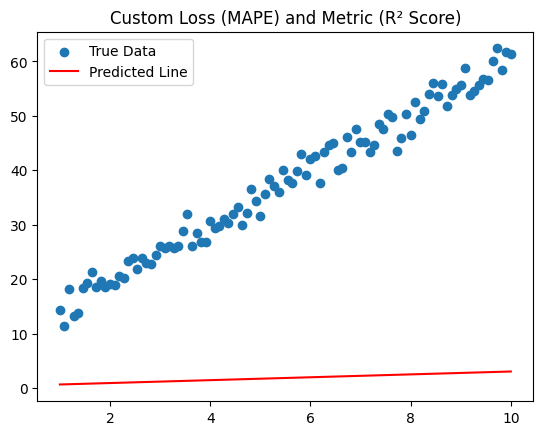

In [17]:
# Plot predictions
plt.scatter(X, y, label='True Data')                           # Scatter plot of actual data
plt.plot(X, preds, color='red', label='Predicted Line')        # Plot predicted line
plt.title("Custom Loss (MAPE) and Metric (R² Score)")
plt.legend()
plt.show()